In [37]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [3]:
df = pd.read_csv("KOPA.csv")
df

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9190,Product A,Female,Location 30,Region 2,20250,6/30/2016,2000,50,365,3601,4301,20250,Finished Payment
9191,Product D,Female,Location 57,Region 6,20250,8/4/2013,2000,50,365,4001,5501,20250,Finished Payment
9192,Product B,Female,Location 8,Region 2,16600,6/14/2014,2000,40,365,3401,4601,16600,Finished Payment
9193,Product B,Male,Location 4,Region 4,16600,12/29/2014,2000,40,365,3400,4600,16600,Finished Payment


In [4]:
df.shape

(9195, 13)

The kopa dataset has `13 columns` and `9195 rows`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9195 entries, 0 to 9194
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product         9195 non-null   object
 1   CustomerGender  9195 non-null   object
 2   Location        9195 non-null   object
 3   Region          9195 non-null   object
 4   TotalPrice      9195 non-null   int64 
 5   StartDate       9195 non-null   object
 6   Deposit         9195 non-null   int64 
 7   DailyRate       9195 non-null   int64 
 8   TotalDays       9195 non-null   int64 
 9   AmountPaid30    9195 non-null   int64 
 10  AmountPaid60    9195 non-null   int64 
 11  AmountPaid360   9195 non-null   int64 
 12  LoanStatus360   9195 non-null   object
dtypes: int64(7), object(6)
memory usage: 934.0+ KB


From the above output of the `.info()`:
* there are 9195 instances with a total of 13 features
* Seems that this dataset has no missing values, with `7 numerical columns` and the rest being objects(text)
  
We can further explore the columns with object datatype

In [6]:
# The product column
df['Product'].value_counts()

Product
Product B    3862
Product A    3141
Product C     999
Product D     975
Product E     213
Product F       5
Name: count, dtype: int64

the output shows that the product column has 6 categories with different counts in each category

In [7]:
df['LoanStatus360'].value_counts()

LoanStatus360
Active              6742
Finished Payment    1604
Blocked              849
Name: count, dtype: int64

`LoanStatus` being our label for the classifications, has 3 categories - Active, - Finished Payment, - Blocked

Active seems to have more instances compare to the other 2 categories

We can also explore the numerical features:

In [8]:
df.describe()

,TotalPrice,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360
count,9195.000000,9195.000000,9195.000000,9195.0,9195.000000,9195.000000,9195.000000
mean,19266.264274,2311.528004,46.451332,365.0,3580.482762,4735.672974,14673.833061
std,6053.291677,1412.612091,13.375759,0.0,2487.320211,2756.332798,6676.242654
min,13775.000000,1000.000000,35.000000,365.0,-3200.000000,-3200.000000,-3200.000000
25%,16600.000000,2000.000000,40.000000,365.0,2500.000000,3437.500000,11351.000000
50%,16600.000000,2000.000000,40.000000,365.0,3351.000000,4400.000000,15140.000000
75%,20250.000000,2000.000000,50.000000,365.0,4601.000000,5668.000000,16600.000000
max,69225.000000,9000.000000,165.000000,365.0,26001.000000,33501.000000,69225.000000


the `describe()` function returns the following:
* `count` that represents the number of instances of that feature in the dataset, that is, `9195` for each feature since there are no missing values
* `mean` showing the average of each feature
* `std` shows how the values are dispersed from the mean
* `min` and `max` showing the minimum and maximum value for each feature
* `percentiles`

for a deeper view of the data, we can use histograms:

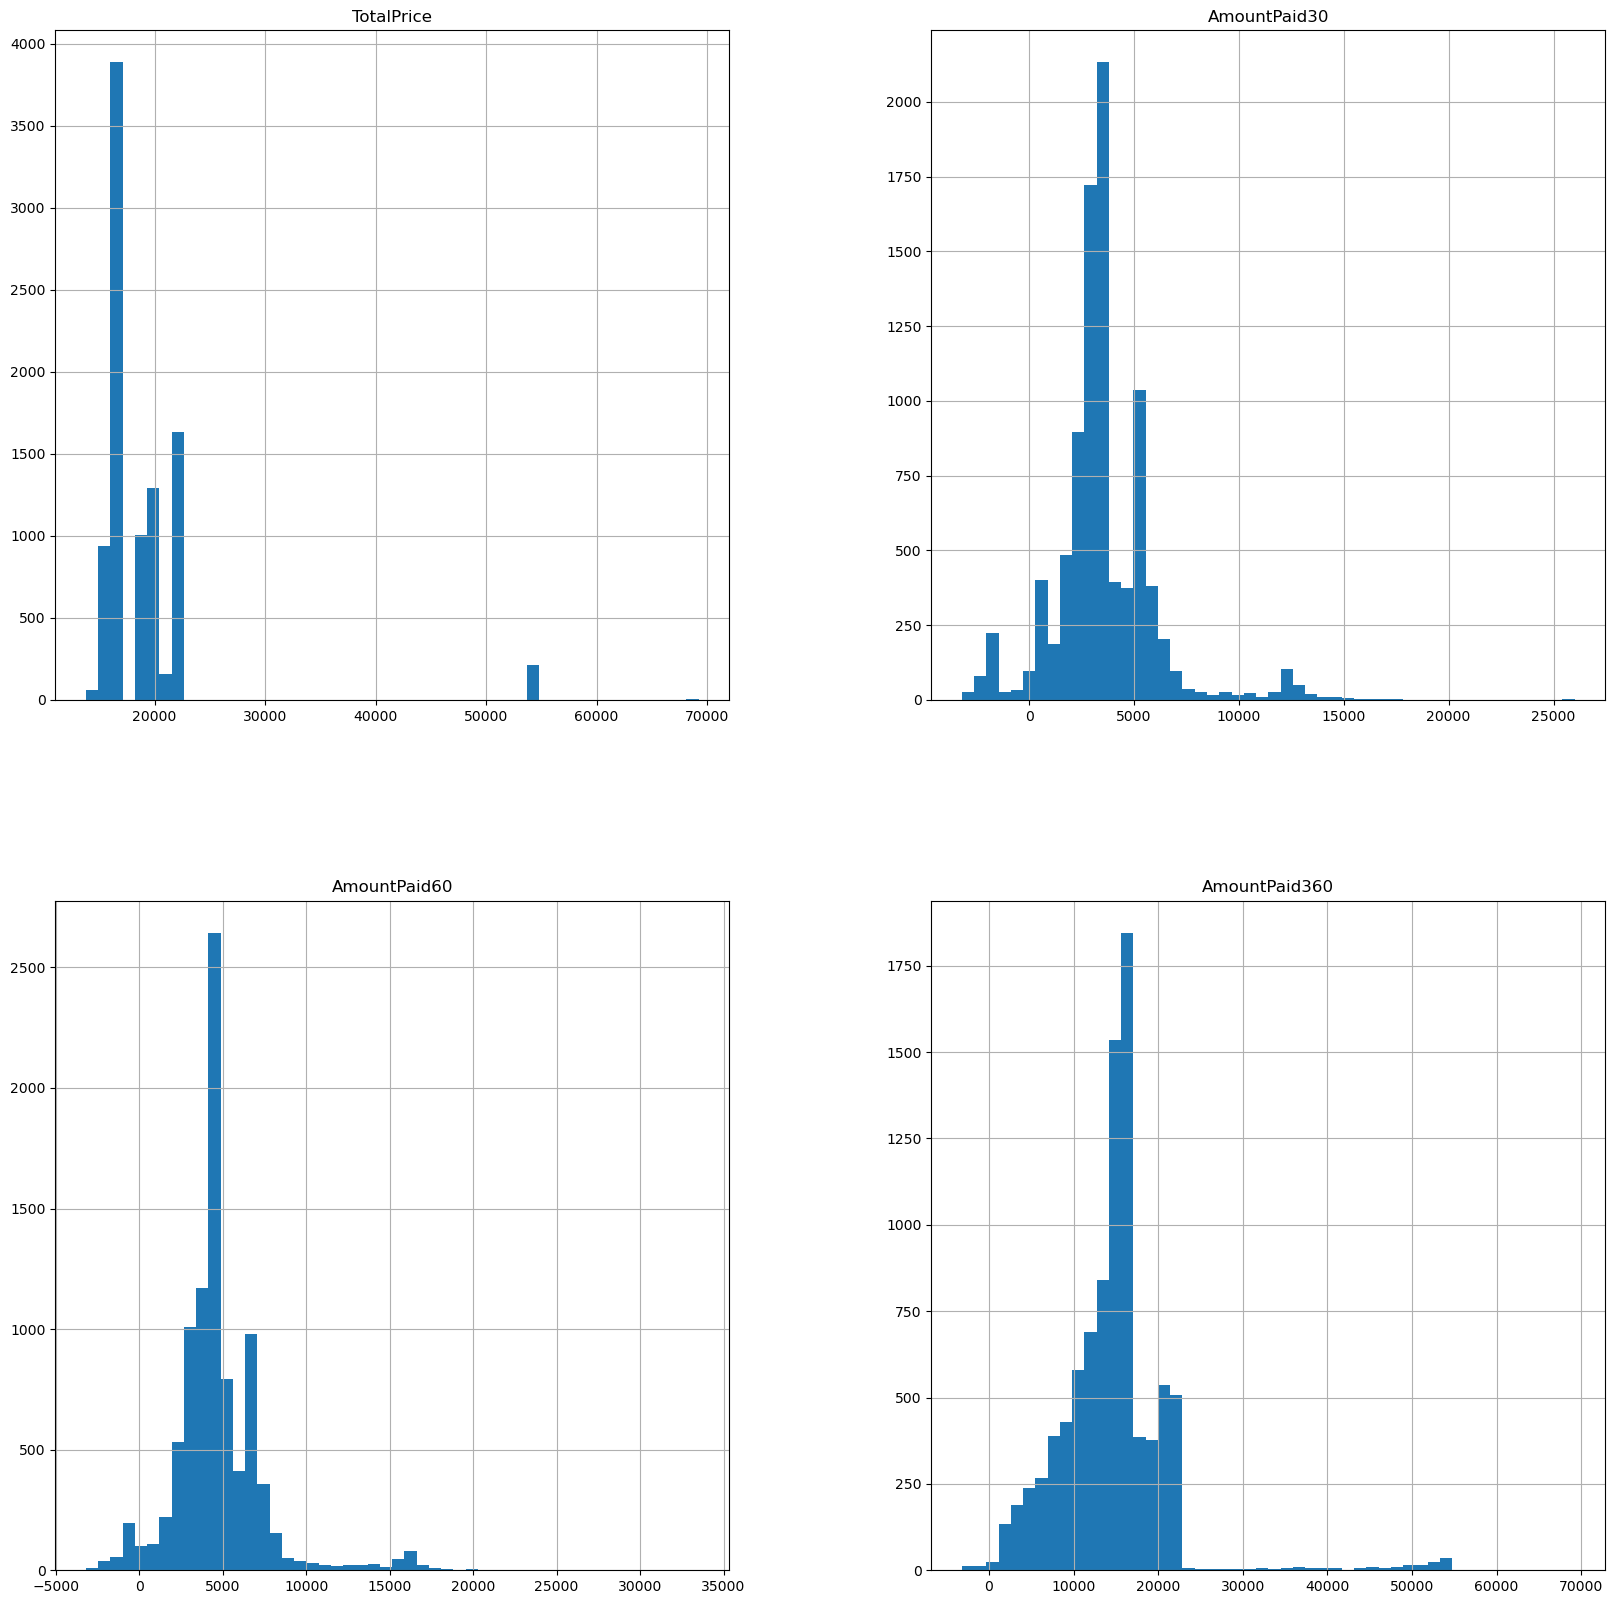

In [10]:
df.hist(column=['TotalPrice', 'AmountPaid30', 'AmountPaid60', 'AmountPaid360'],bins=50, figsize=(20, 20))
plt.show()

From the histogram above:
* The attributes have different scales, which can be fixed with feature scaling
* Most of the attibutes have outliers, which will be fixed later on
* Most of the repayments at the end of the year are ranging 1000 - 20000 ksh

We can now observe how people repay their loan and how they are classified

In [15]:
blocked = df[df['LoanStatus360'] == 'Blocked']
blocked

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
6742,Product A,Female,Location 149,Region 1,22250,2/11/2016,4000,50,365,4000,4000,4700,Blocked
6743,Product A,Female,Location 3,Region 3,19250,10/8/2015,1000,50,365,370,370,570,Blocked
6744,Product C,NotSpecified,Location 188,Region 6,15600,11/19/2012,1000,40,365,4500,4500,9300,Blocked
6745,Product B,Female,Location 45,Region 3,16600,7/16/2014,2000,40,365,3120,4360,7670,Blocked
6746,Product D,Male,Location 189,Region 5,20250,8/31/2013,2000,50,365,2801,2801,2801,Blocked
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7586,Product A,Female,Location 62,Region 3,20250,12/27/2015,2000,50,365,701,801,4101,Blocked
7587,Product A,Male,Location 108,Region 6,22250,7/15/2015,4000,50,365,4050,4800,8050,Blocked
7588,Product B,Female,Location 21,Region 7,16600,12/21/2014,2000,40,365,3471,4671,5501,Blocked
7589,Product D,Male,Location 352,Region 1,20250,4/29/2013,2000,50,365,3369,4672,6459,Blocked


In [16]:
blocked = df[df['LoanStatus360'] == 'Active']
blocked

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,Product B,Male,Location 2,Region 2,16600,7/4/2014,2000,40,365,3121,4241,13621,Active
1,Product B,Male,Location 3,Region 3,16600,1/2/2015,2000,40,365,3061,4171,15041,Active
2,Product C,Female,Location 5,Region 5,15600,12/8/2012,1000,40,365,2160,3280,15340,Active
3,Product B,Male,Location 6,Region 1,16600,2/20/2015,2000,40,365,3041,4241,15321,Active
4,Product D,Female,Location 7,Region 2,20250,10/28/2013,2000,50,365,3470,4820,13720,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,Product B,Male,Location 23,Region 4,16600,5/5/2015,2000,40,365,2681,3781,14100,Active
6738,Product B,Male,Location 40,Region 6,16600,4/27/2014,2000,40,365,2811,3291,6431,Active
6739,Product B,Male,Location 70,Region 7,16600,8/23/2014,2000,40,365,4600,6200,16260,Active
6740,Product A,Male,Location 3,Region 3,19250,5/8/2016,1000,50,365,-2250,-1000,11850,Active


From the above dataframe:
* if the customer fails to continue paying their loan after more than 30 days their account gets `Blocked`
* if the customer continues to actively repay their loan the status stays `Active`
* if they complete their payment the status is `Finished Payment`

The data seems to have 2 outputs:
* `AmountPaid360` - meaning it's a regression problem
* `LoanStatus360` - meaning it's also a classification problem

Before we continue with visualizations we can split the data into train and test set:

### Regression

In [19]:
df_reg = df.copy()

In [23]:
# determining if our dataset is imbalanced
class_percentages = df['LoanStatus360'].value_counts(normalize=True) * 100
class_percentages

LoanStatus360
Active              73.322458
Finished Payment    17.444263
Blocked              9.233279
Name: proportion, dtype: float64

Majority classes comprises over 70% and minority class is below 10%, meaning our data is imbalanced, we'll use `StratifiedSampling` to split the data

In [31]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index  in split.split(df_reg, df_reg['LoanStatus360']):
    strat_train_set = df_reg.loc[train_index]
    strat_test_set = df_reg.loc[test_index]

#### Visualizations of the `AMOUNTPAID360` feature

In [32]:
df_reg_vis = strat_train_set.copy()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
8649,Product C,NotSpecified,Location 177,Region 1,15600,10/28/2012,1000,40,365,2250,3250,15600,Finished Payment
6367,Product A,Female,Location 67,Region 1,19250,11/11/2015,1000,50,365,630,2120,14870,Active
5446,Product A,Female,Location 111,Region 6,19250,12/23/2015,1000,50,365,950,1950,14900,Active
1973,Product B,Male,Location 3,Region 3,16600,9/11/2014,2000,40,365,3121,4201,10986,Active
3024,Product A,Male,Location 88,Region 7,22250,8/14/2015,4000,50,365,5350,6850,20900,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,Product A,Female,Location 111,Region 6,19250,8/13/2015,1000,50,365,120,970,10370,Active
8954,Product A,Male,Location 149,Region 1,22250,5/21/2015,4000,50,365,5200,6650,22250,Finished Payment
8128,Product C,Female,Location 350,Region 6,15600,9/6/2012,1000,40,365,2470,3331,15600,Finished Payment
7048,Product B,Male,Location 73,Region 4,16600,3/18/2014,2000,40,365,2721,2721,2921,Blocked


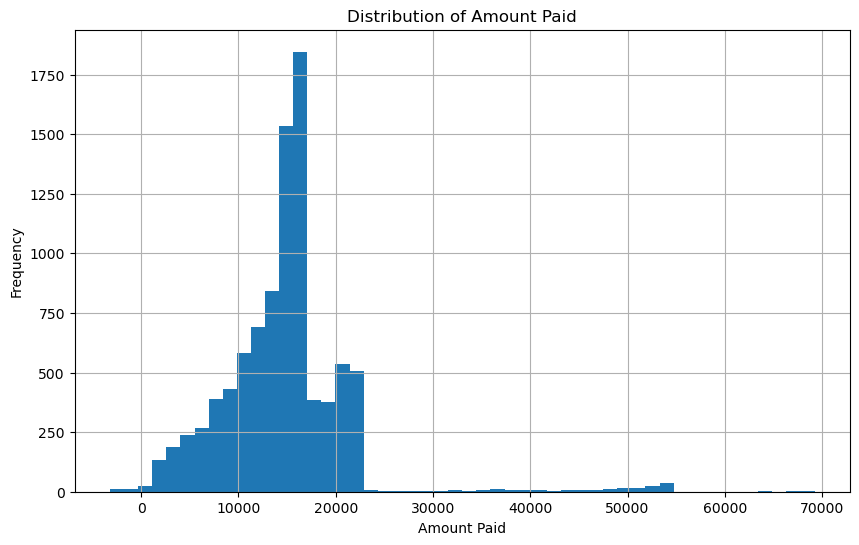

In [50]:
df_reg['AmountPaid360'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Amount Paid')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Paid')
plt.show()

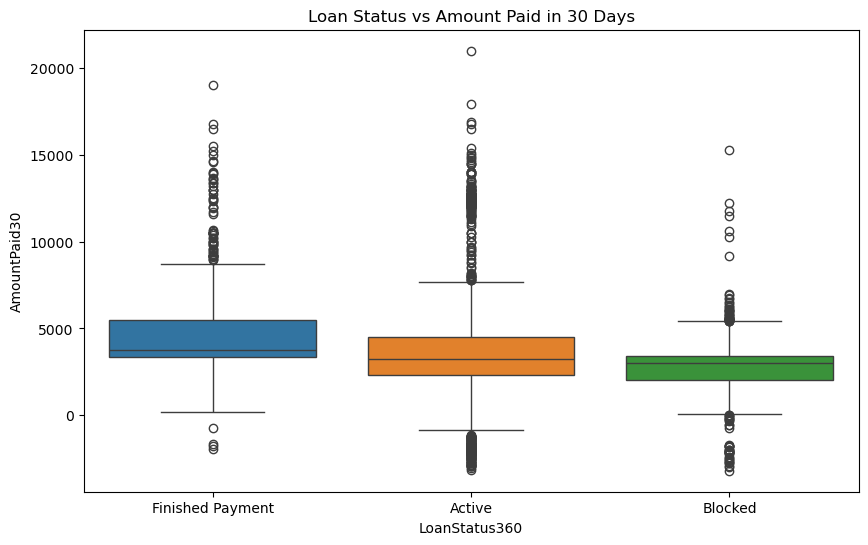

In [61]:
# Amount paid30 vs loanstatus
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid30", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 30 Days")
plt.show()

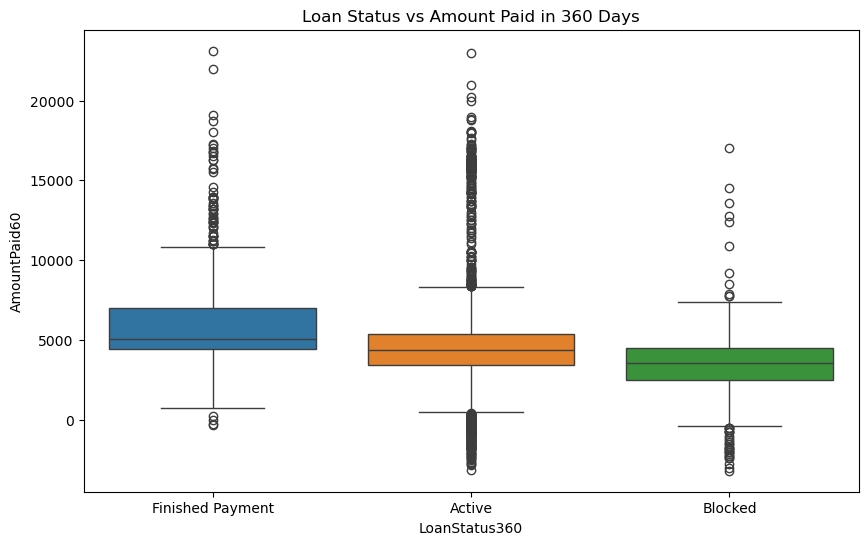

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid60", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 360 Days")
plt.show()

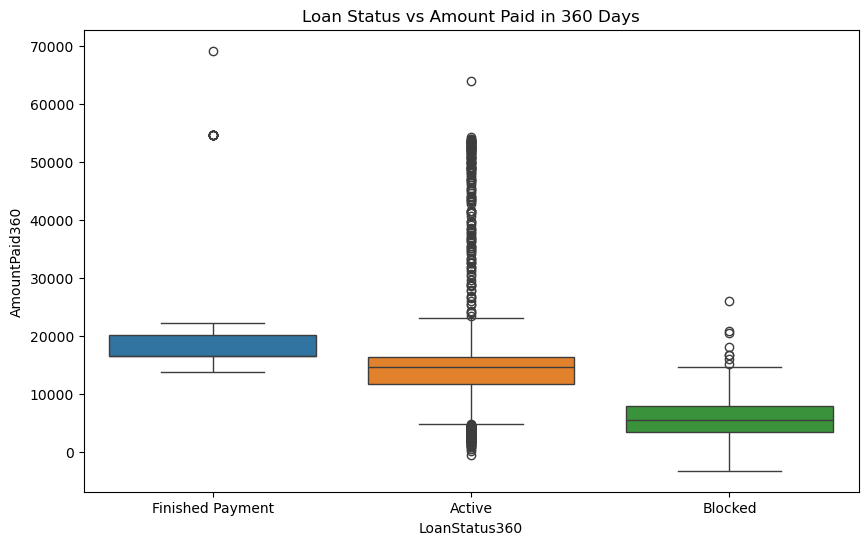

In [59]:
# Amount paid vs LoanStatus
plt.figure(figsize=(10, 6))
sns.boxplot(x="LoanStatus360", y="AmountPaid360", hue='LoanStatus360', data=df_reg_vis)
plt.title("Loan Status vs Amount Paid in 360 Days")
plt.show()

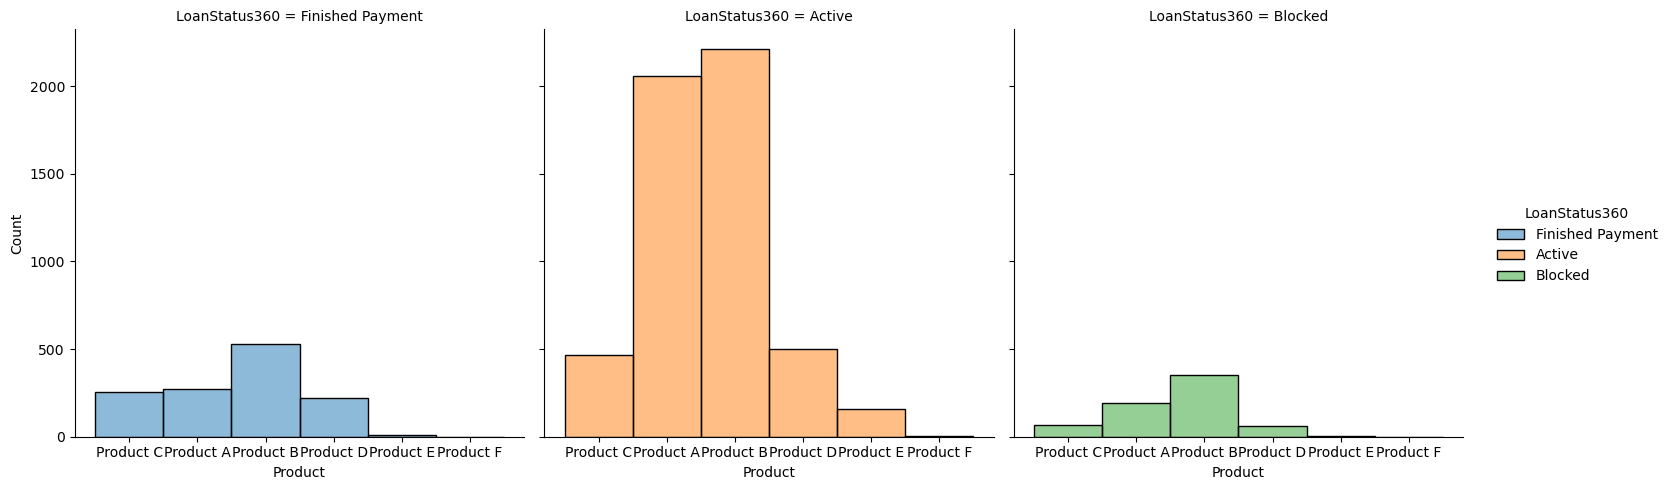

In [44]:
sns.displot(data=df_reg_vis, x='Product', hue='LoanStatus360', col='LoanStatus360');

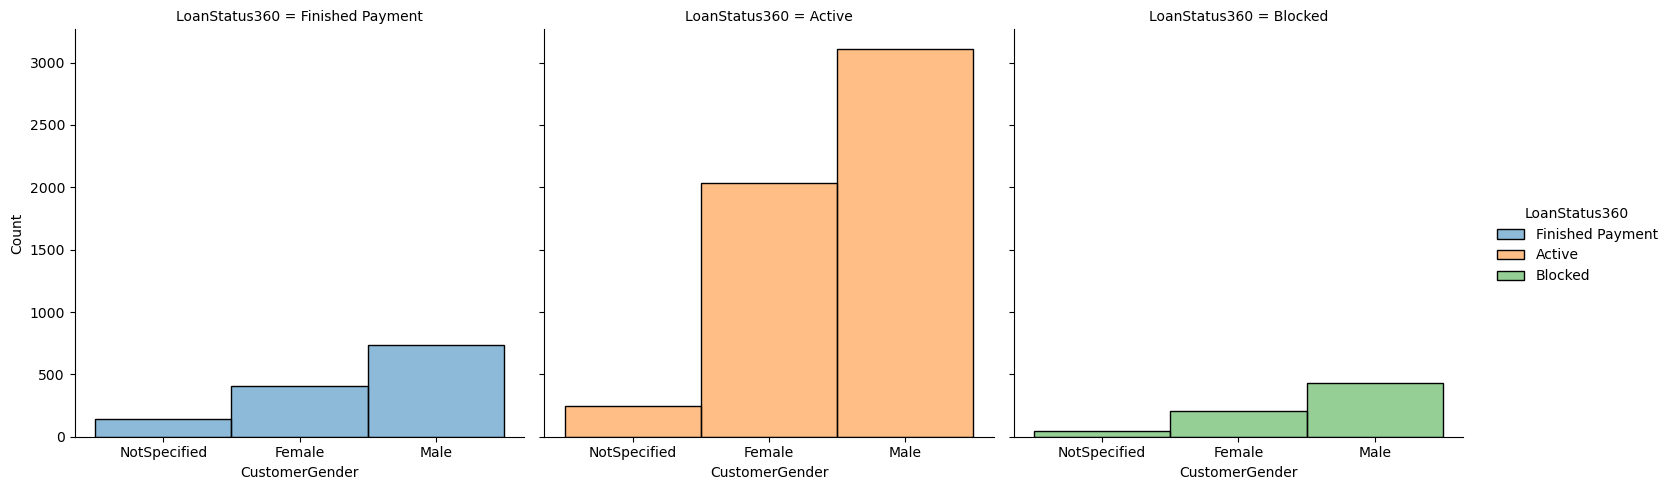

In [56]:
sns.displot(data=df_reg_vis, x='CustomerGender', hue='LoanStatus360', col='LoanStatus360');